# Gradient Boosting Machine (GBM)

The Gradient Boosting Machine (GBM), also known as Gradient Boosted Decision Trees (GBDT), is another ensemble method that combines multiple decision trees to create a more powerful model. The main idea behind GBM is to train a sequence of weak learners (in this case, decision trees) where each tree tries to correct the mistakes of the previous one.

## Key Concepts

- **Weak Learners**: A weak learner is a model that is slightly better than random guessing. In the case of GBM, the weak learners are decision trees with a small depth (usually 1-5 levels).
- **Boosting**: Boosting is an ensemble technique where the predictors are trained sequentially, and each tries to correct the mistakes of the previous one.
- **Gradient Descent**: GBM uses gradient descent to minimize the loss function. In each iteration, the model calculates the gradient of the loss function and updates the model in the direction that minimizes the loss.
- **Shrinkage**: Shrinkage is a regularization technique used in GBM to slow down the learning process. It helps to prevent overfitting by reducing the impact of each tree on the final model.
- **Stochastic Gradient Boosting**: In stochastic gradient boosting, each tree is trained on a random subset of the data. This helps to introduce randomness and reduce overfitting.

## Gradient Boosting

The general idea behind gradient boosting is to combine multiple weak learners (in this case, decision trees) to create a strong learner. The algorithm works as follows:

1. **Initialization**:
- Starts with an initial model, usually a simple one like a decision tree.
- This model is denoted as $F_0(x)$, which is the prediction for all instances in the dataset.
2. **Sequential Learning**:
For each iteration $t = 1, 2, ..., T$:
- Compute the residuals $ r_{ti} $, which are the differences between the true target values $ y_i $ and the predictions of the previous model $ F_{t-1}(x_i) $.
$$ r_{ti} = y_i - F_{t-1}(x_i) $$
- Fit a new model $ h_t(x) $ to these residuals $ r_{ti} $.
- Update the model by adding the new model to the existing model:
$$ F_t(x) = F_{t-1}(x) + \eta h_t(x) $$
- where
    - $ \eta $ is the learning rate (shrinkage) that controls the contribution of each tree to the final prediction.
    - $ h_t(x) $ is the new model (weak learner) that is trained to predict the residuals.

$$ h_t(x) = \arg \min_h \sum_{i=1}^{n} L(y_i, F_{t-1}(x_i) + h(x_i)) $$


3. **Loss Function**:
Common loss functions used in gradient boosting are:
- **Regression**: Mean Squared Error (MSE)
- **Classification**: Log Loss (Binary Cross-Entropy)

4. **Gradient Descent**:
At each iteration, the model is updated in the direction that minimizes the loss function.
- It uses the negative gradient of the loss function with respect to the predictions as the ‘pseudo-residuals’ for training the next model:
$$ r_{ti} = - \left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x) = F_{t-1}(x_i)} $$

5. **Ouput**:
- After $T$ iterations, the final model is:
$$ F_T(x) = F_0(x) + \eta h_1(x) + \eta h_2(x) + ... + \eta h_T(x) $$


Default hyperparameters for GBM in scikit-learn:
- `n_estimators=100`: The number of weak learners (trees) in the ensemble.
- `learning_rate=0.1`: The shrinkage parameter that controls the contribution of each tree to the final prediction.
- `max_depth=3`: The maximum depth of each decision tree.



In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


- The training set accuracy is 100% -> overfitting

To reduce overfitting, we can:
- Limit the depth of the trees (`max_depth`)
- Lower the learning rate (`learning_rate`)

In [14]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [15]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


- Both make the model less complex and less likely to overfit.

As for the other decision tree-based models, we can visualize the feature importances to get insights into the model's decision-making process.

In [16]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

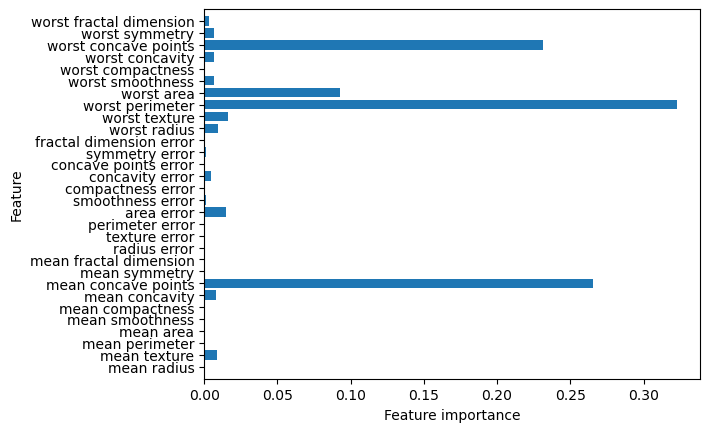

In [17]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

- The feature importances of the GBM are somewhat similar to the Random Forest, but the GBM tends to give more weight to the most important features.

Both GBM and Random Forests perform well on similar kinds of problems, a common approach is to first try random forests and then try GBM if you need better performance or prediction time is at a premium.

## Pros and Cons of GBM

**Pros**
    - Work well without feature scaling
    - Handle mixed data types


**Cons**
    - Require careful tuning of hyperparameters
    - Training can be slow
    - Does not work well with high-dimensional sparse data

## Hyperparameters

- `n_estimators`: The number of weak learners (trees) in the ensemble.
    - higher values can lead to overfitting
    - a common approach is to set depend on the time and memory constraints, and then tune other hyperparameters.
- `learning_rate`: The shrinkage parameter that controls the contribution of each tree to the final prediction.
    - lower values require more trees to achieve the same level of performance
- `max_depth`: The maximum depth of each decision tree.
    - Usually set to a small value (1-5) to create weak learners.
- `subsample`: The fraction of samples used to train each tree.